# 警察庁の交通事故に関するオープンデータを前処理して、事故からの死亡を予測するコード (EDA)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('max_columns',100)

In [2]:
traffic_accident_data = pd.read_pickle("data/traffic_accident_data.pickle")

In [3]:
traffic_accident_data.head()

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,発生日時 年,発生日時 月,発生日時 日,発生日時 時,発生日時 分,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,...,tiiki-code,ken-name,sityouson-name1,sityouson-name2,sityouson-name3,accident_type,road_cd_f4,road_cd_l1,road_type,road_bypass,road_updown_type,day_night_type,weather_type,terrain_type,road_condition_type,road_shape_type,roundabout_diameter_type,traffic_lights_type,pause_sign_type_a,pause_sign_type_b,pause_display_type_a,pause_display_type_b,road_width_type,road_alignment_type,zone_regulation_type,pedestrian_road_division_type,accident_vehicle_type,age_type_a,age_type_b,parties_type_a,parties_type_b,use_type_a,use_type_b,vehicle_shape_type_a,vehicle_shape_type_b,speed_regulation_type_a,speed_regulation_type_b,collision_site_type_a,collision_site_type_b,damage_to_vehicle_type_a,damage_to_vehicle_type_b,airbag_equipment_type_a,airbag_equipment_type_b,side_airbag_equipment_type_a,side_airbag_equipment_type_b,personal_injury_type_a,personal_injury_type_b,weekday_type,holiday_type,death_flag
0,1,10,59,1,2,0,1,40010,1,0,234,2020,1,6,7,20,11,2,3,3,14,0,7,0,23,0,23,4,9,20,70,1,4,21,45,65,3,4,31,31,1,1,4,4,42,13,3,3,2,1,...,1234,北海道,NaN,NaN,北広島市,負傷,4001,0,高速自動車国道,現道区間又は包括路線,上,昼－明,曇,非市街地,舗装－凍結,単路－その他,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－9.0m以上,その他,中央分離帯,区分なし,車両相互,45～54歳,65～74歳,乗用車－普通車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,左_中央_右_中央,前_中央_後_中央,小破,小破,その他,装備あり作動,その他,その他,負傷,損傷なし,月,その他,0
1,1,10,59,2,2,0,1,40010,1,0,213,2020,1,16,6,39,23,1,3,1,14,0,7,0,23,0,23,4,9,1,70,1,4,21,65,45,3,13,31,1,1,11,10,10,80,16,2,2,2,2,...,1213,北海道,NaN,NaN,苫小牧市,負傷,4001,0,高速自動車国道,現道区間又は包括路線,上,夜－明,晴,非市街地,舗装－乾燥,単路－その他,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－9.0m以上,単路（交差点付近を含む）,中央分離帯,区分なし,車両相互,65～74歳,45～54歳,乗用車－普通車,貨物車－普通車,自家用,事業用,乗用車,貨物車,指定の速度規制なし等,指定の速度規制なし等,前_左_それ以外,前_中央_後_右,中破,中破,その他,その他,その他,その他,損傷なし,負傷,木,その他,0
2,1,10,59,3,2,0,2,40130,1,0,224,2020,1,5,6,15,23,5,3,3,14,0,7,0,23,0,23,4,9,1,70,6,3,21,1,35,3,3,31,31,1,1,4,4,40,10,1,2,1,2,...,1224,北海道,NaN,NaN,千歳市,負傷,4013,0,高速自動車国道,現道区間又は包括路線,上,夜－明,雪,非市街地,舗装－凍結,単路－その他,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－9.0m以上,単路（交差点付近を含む）,中央線－ポストコーン,区分あり－路側帯,車両相互,0～24歳,35～44歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,左_中央_それ以外,前_中央_それ以外,大破,中破,装備あり作動,その他,その他,その他,負傷,負傷,日,その他,0
3,1,10,59,4,2,0,1,40130,1,0,209,2020,1,24,15,20,12,5,3,3,11,0,7,0,23,0,23,4,9,1,70,6,3,21,55,55,3,3,31,31,1,1,4,4,47,84,2,2,1,2,...,1209,北海道,NaN,NaN,夕張市,負傷,4013,0,高速自動車国道,現道区間又は包括路線,上,昼－昼,雪,非市街地,舗装－凍結,単路－トンネル,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－9.0m以上,単路（交差点付近を含む）,中央線－ポストコーン,区分あり－路側帯,車両相互,55～64歳,55～64歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,左_中央_後_左,前_左_左_中央,中破,中破,装備あり作動,その他,装備あり作動,その他,損傷なし,負傷,金,その他,0
4,1,10,101,1,2,0,1,39990,0,0,101,2019,12,22,18,51,22,2,1,1,1,0,7,1,22,9,22,15,9,30,70,4,2,21,35,25,3,3,31,31,1,1,3,3,10,40,3,3,2,2,...,1101,北海道,札幌市,NaN,中央区,負傷,3999,0,一般市町村道,現道区間又は包括路線,対象外,夜－夜,曇,市街地－人口集中,舗装－乾燥,交差点－その他,環状交差点以外,施設なし,標準－反射式,規制なし,表示なし,表示なし,交差点－中（5.5m以上）－中,交差点内,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,35～44歳,25～34歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,40㎞／ｈ以下,40㎞／ｈ以下,前_中央_それ以外,左_中央_それ以外,小破,小破,その他,その他,その他,その他,損傷なし,負傷,日,その他,0


In [4]:
traffic_accident_data.shape

(690415, 112)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.rcParams['font.family'])

['sans-serif']


In [16]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [44]:
# 後でデータの型を指定しておく
def GroupbyPlot(df:pd.DataFrame,
                             group:str,
                             target:str,
                             y_label:str,
                             x_label:str):
    group_name_summary = df.groupby(group)[target].agg([np.mean, "count"])
    index_list = group_name_summary.index.tolist()
    
    group_name_summary = group_name_summary.reset_index()
    
    fig, ax = plt.subplots(figsize=(13,5))
    ax3 = ax.twinx()
    rspine = ax3.spines['right'] 
    rspine.set_position(('axes', 1.15))
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    fig.subplots_adjust(right=0.7)
    group_name_summary["mean"].plot(ax=ax, style='r-', kind="line")
    group_name_summary["count"].plot(ax=ax, secondary_y=True,kind="bar",color='b',alpha=0.5 );
    # ax.set_title('');
    ax.set_ylabel(y_label);
    ax.set_xlabel(x_label); 
    ax.set_xticklabels(index_list);
    ax3.set_ylabel('count');
    ax.legend();
    return group_name_summary

In [45]:
traffic_accident_data['genuine_pref_name'].head()

0    北海道
1    北海道
2    北海道
3    北海道
4    北海道
Name: genuine_pref_name, dtype: object

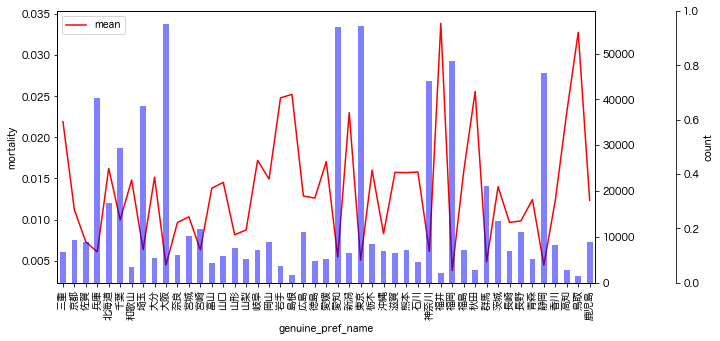

In [50]:
target_string = 'genuine_pref_name'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

大都市は, 交通事故の件数が多いが死亡率は小さい, 田舎は逆

In [43]:
traffic_accident_data['ken-name'].head()

0    北海道
1    北海道
2    北海道
3    北海道
4    北海道
Name: ken-name, dtype: object

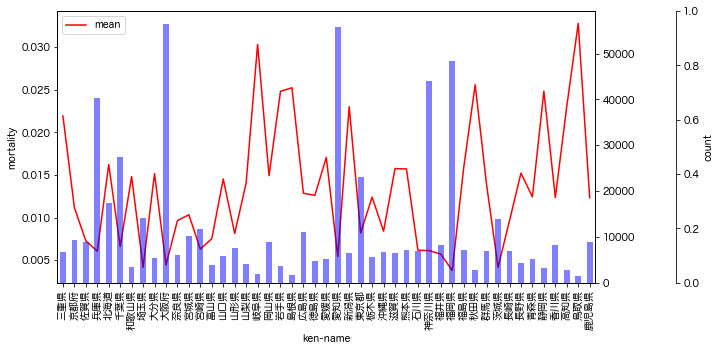

In [37]:
target_string = 'ken-name'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

In [58]:
traffic_accident_data['genuine_pref_name'].isnull().sum()

0

In [59]:
traffic_accident_data['ken-name'].isnull().sum()

123009

ken-nameは欠損値が多くて参考にならない？

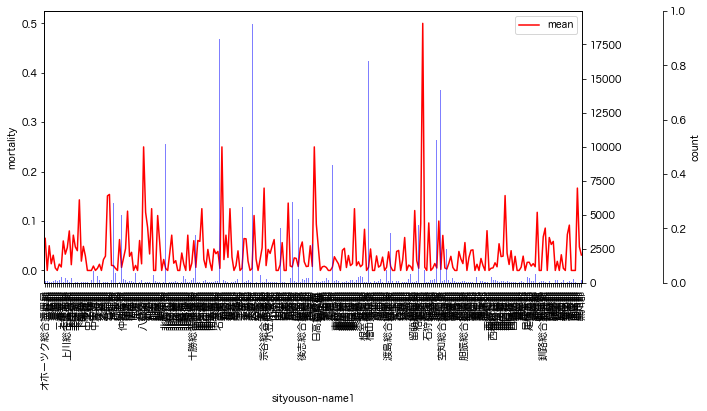

In [38]:
target_string = 'sityouson-name1'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

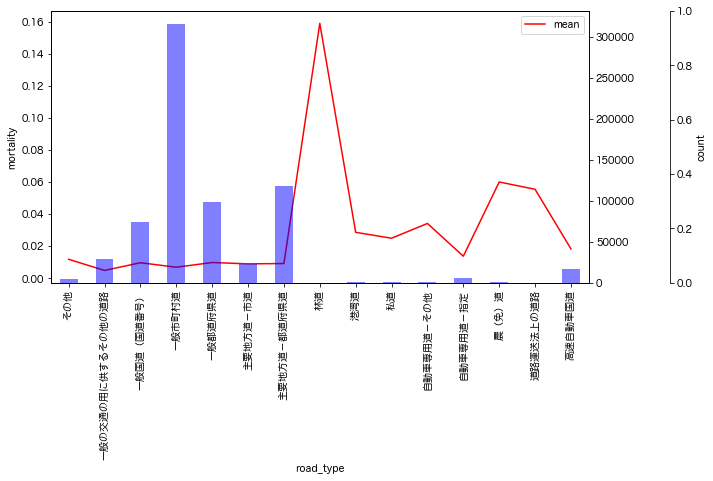

In [39]:
target_string = 'road_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

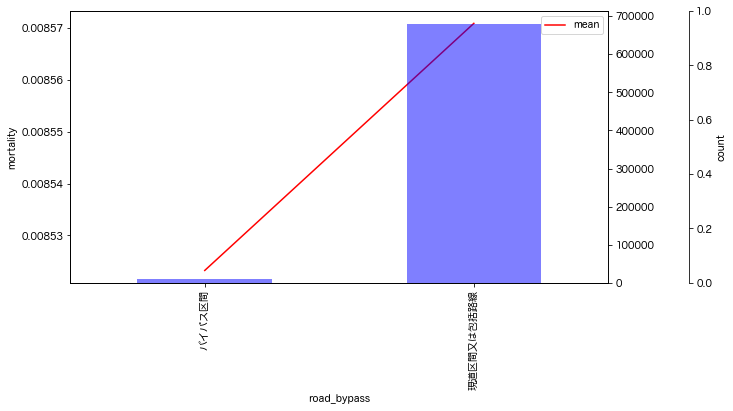

In [60]:
target_string = 'road_bypass'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

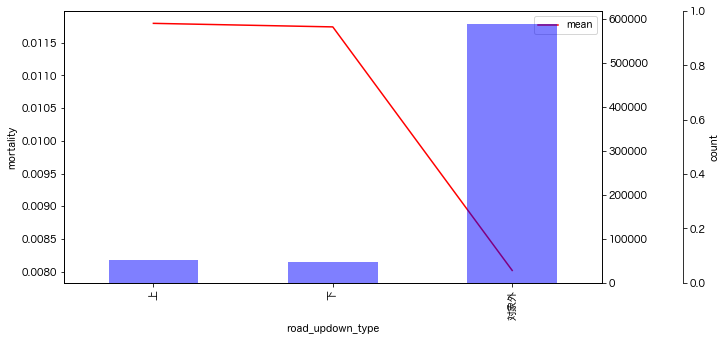

In [61]:
target_string = 'road_updown_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

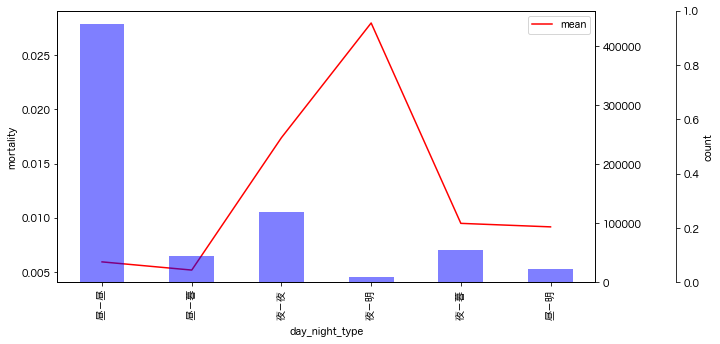

In [62]:
target_string = 'day_night_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

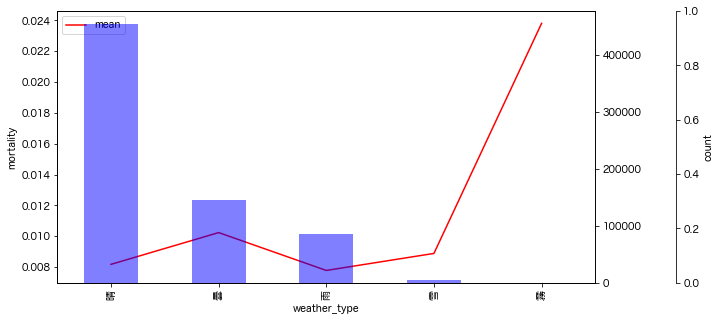

In [63]:
target_string = 'weather_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

In [68]:
traffic_accident_data[traffic_accident_data['weather_type'] == '霧']

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,発生日時 年,発生日時 月,発生日時 日,発生日時 時,発生日時 分,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,...,tiiki-code,ken-name,sityouson-name1,sityouson-name2,sityouson-name3,accident_type,road_cd_f4,road_cd_l1,road_type,road_bypass,road_updown_type,day_night_type,weather_type,terrain_type,road_condition_type,road_shape_type,roundabout_diameter_type,traffic_lights_type,pause_sign_type_a,pause_sign_type_b,pause_display_type_a,pause_display_type_b,road_width_type,road_alignment_type,zone_regulation_type,pedestrian_road_division_type,accident_vehicle_type,age_type_a,age_type_b,parties_type_a,parties_type_b,use_type_a,use_type_b,vehicle_shape_type_a,vehicle_shape_type_b,speed_regulation_type_a,speed_regulation_type_b,collision_site_type_a,collision_site_type_b,damage_to_vehicle_type_a,damage_to_vehicle_type_b,airbag_equipment_type_a,airbag_equipment_type_b,side_airbag_equipment_type_a,side_airbag_equipment_type_b,personal_injury_type_a,personal_injury_type_b,weekday_type,holiday_type,death_flag
2019,1,25,108,46,2,0,1,30000,0,0,203,2019,12,31,1,50,22,4,1,2,14,0,7,0,23,0,23,5,9,1,70,4,2,21,55,1,12,3,1,31,11,1,4,4,0,88,4,3,2,2,...,7203,福島県,NaN,NaN,郡山市,負傷,3000,0,一般市町村道,現道区間又は包括路線,対象外,夜－夜,霧,市街地－人口集中,舗装－湿潤,単路－その他,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－13.0m以上,単路（交差点付近を含む）,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,55～64歳,0～24歳,貨物車－中型車,乗用車－普通車,事業用,自家用,貨物車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,それ以外_,前_左_前_左,損壊なし,小破,その他,その他,その他,その他,損傷なし,負傷,火,前日,0
4321,1,30,890,19,2,0,1,20000,0,0,222,2020,1,12,13,20,12,4,1,1,1,0,1,9,22,9,22,15,9,30,70,4,2,21,45,55,3,51,31,0,1,0,3,0,20,10,3,3,2,0,...,8222,茨城県,NaN,NaN,鹿嶋市,負傷,2000,0,一般都道府県道,現道区間又は包括路線,対象外,昼－昼,霧,市街地－人口集中,舗装－乾燥,交差点－その他,環状交差点以外,点灯－３灯式,規制なし,規制なし,表示なし,表示なし,交差点－中（5.5m以上）－中,交差点内,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,45～54歳,55～64歳,乗用車－普通車,軽車両－自転車,自家用,対象外当事者,乗用車,対象外当事者,40㎞／ｈ以下,対象外当事者,右_中央_それ以外,前_中央_それ以外,小破,小破,その他,対象外当事者,その他,対象外当事者,損傷なし,負傷,日,前日,0
5341,1,41,113,2,2,0,1,10100,0,0,386,2019,12,20,8,6,12,4,3,1,1,0,1,9,22,9,22,19,9,30,70,1,2,21,45,25,3,3,31,31,1,1,5,5,40,80,3,3,2,2,...,10386,NaN,NaN,NaN,NaN,負傷,1010,0,主要地方道－都道府県道,現道区間又は包括路線,対象外,昼－昼,霧,非市街地,舗装－乾燥,交差点－その他,環状交差点以外,点灯－３灯式,規制なし,規制なし,表示なし,表示なし,交差点－大（13.0ｍ以上）－大,交差点内,中央分離帯,区分あり－縁石・ブロック等,車両相互,45～54歳,25～34歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,60㎞／ｈ以下,60㎞／ｈ以下,左_中央_それ以外,前_左_それ以外,小破,小破,その他,その他,その他,その他,損傷なし,負傷,金,その他,0
7286,1,43,127,5,2,0,2,39990,0,0,222,2019,12,18,6,20,23,4,3,1,12,0,7,0,23,0,23,1,9,1,70,4,2,21,35,35,3,3,31,31,1,1,3,3,10,30,3,3,2,2,...,12222,千葉県,NaN,NaN,我孫子市,負傷,3999,0,一般市町村道,現道区間又は包括路線,対象外,夜－明,霧,非市街地,舗装－乾燥,単路－橋,環状交差点以外,施設なし,対象外当事者,対象外当事者,その他,その他,単路－3.5m未満,単路（交差点付近を含む）,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,35～44歳,35～44歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,40㎞／ｈ以下,40㎞／ｈ以下,前_中央_それ以外,後_中央_それ以外,小破,小破,その他,その他,その他,その他,損傷なし,負傷,水,その他,0
8300,1,44,112,27,2,0,1,4640,1,0,231,2020,1,8,18,0,22,4,1,2,1,0,1,9,22,0,23,15,9,30,70,5,2,1,45,55,4,61,31,0,1,0,10,0,10,0,3,0,2,0,...,13231,NaN,NaN,NaN,NaN,負傷,4640,0,高速自動車国道,現道区間又は包括路線,上,夜－夜,霧,市街地－人口集中,舗装－湿潤,交差点－その他,環状交差点以外,点灯－３灯式,規制なし,対象外当事者,表示なし,その他,交差点－中（5.5m以上）－中,交差点内,中央分離なし,区分あり－縁石・ブロック等,人対車両,45～54歳,55～64歳,乗用車－軽自動車,歩行者,自家用,対象外当事者,乗用車,対象外当事者,指定の速度規制なし等,対象外当事者,前_中央_それ以外,それ以外_,小破,対象外当事者,その他,対象外当事者,その他,対象外当事者,損傷なし,負傷,水,その他,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683184,1,73,59,108,2,0,1,45110,1,2226,204,2019,12,25,5,15,22,4,3,1,14,0,7,0,23,0,23,6,9,1,70,1,3,21,25,65,12,3,1,31,11,1,7,7,

In [66]:
len(traffic_accident_data[traffic_accident_data['weather_type'] == '霧'][['weather_type', 'death_flag']])

294

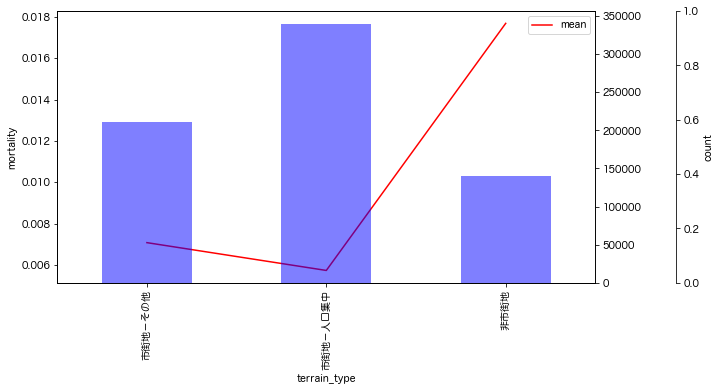

In [69]:
target_string = 'terrain_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

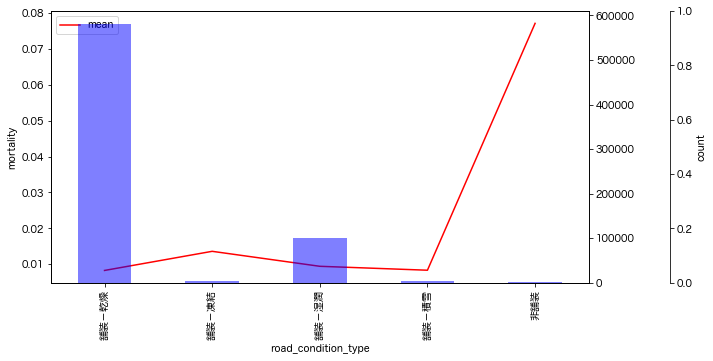

In [70]:
target_string = 'road_condition_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

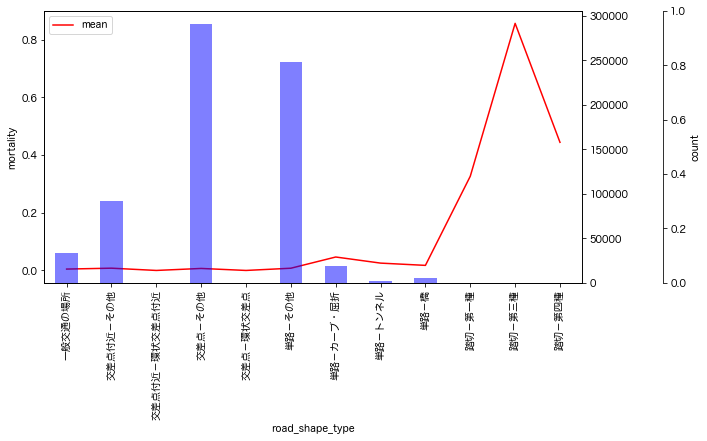

In [71]:
target_string = 'road_shape_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

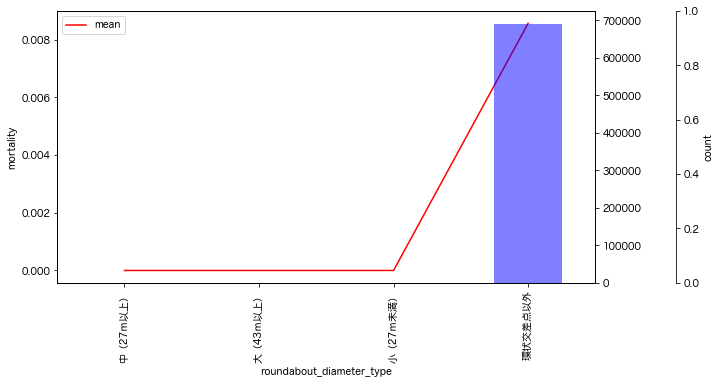

In [72]:
target_string = 'roundabout_diameter_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

In [73]:
df_summary

,roundabout_diameter_type,mean,count
0,中（27ｍ以上）,0.00000,11
1,大（43ｍ以上）,0.00000,1
2,小（27ｍ未満）,0.00000,8
3,環状交差点以外,0.00857,690395


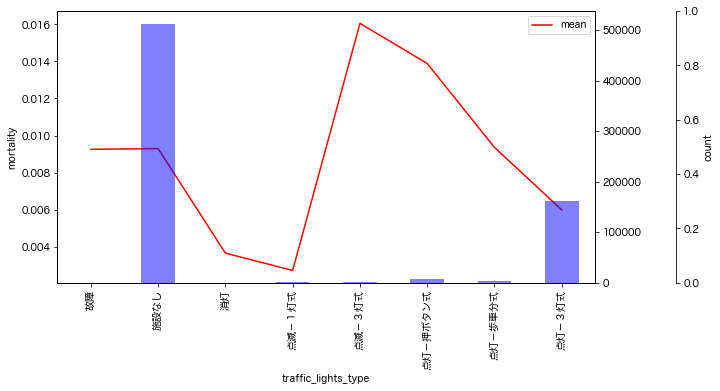

In [74]:
target_string = 'traffic_lights_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

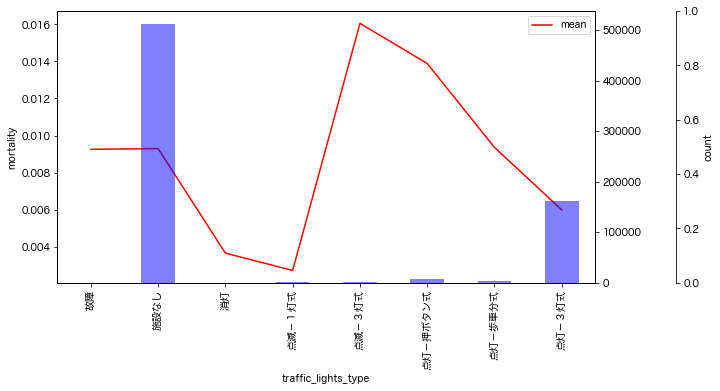

In [75]:
target_string = 'traffic_lights_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

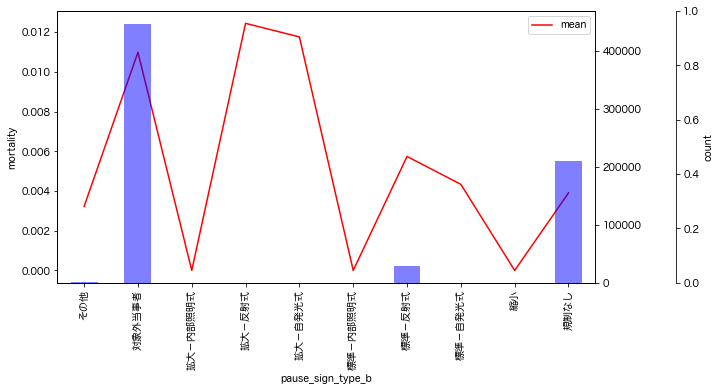

In [76]:
target_string = 'pause_sign_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)


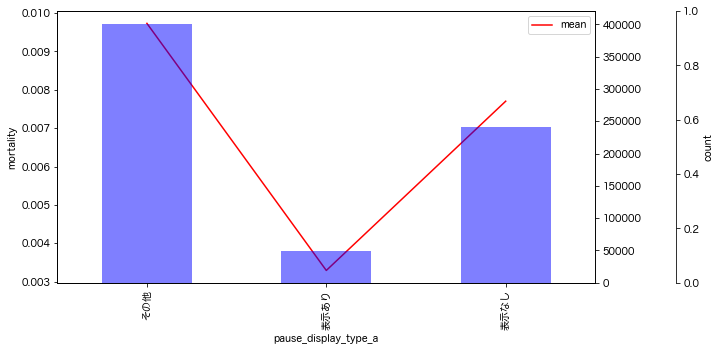

In [77]:
target_string = 'pause_display_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

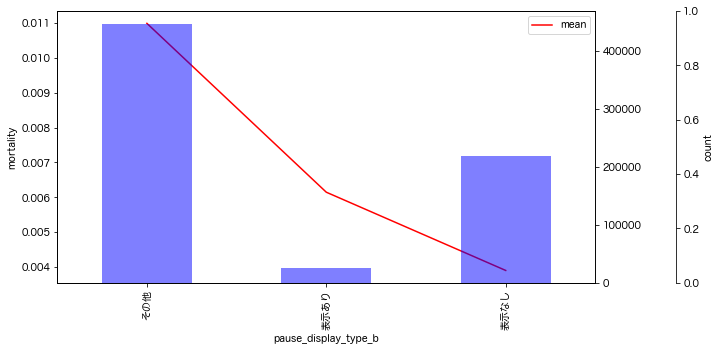

In [78]:
target_string = 'pause_display_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

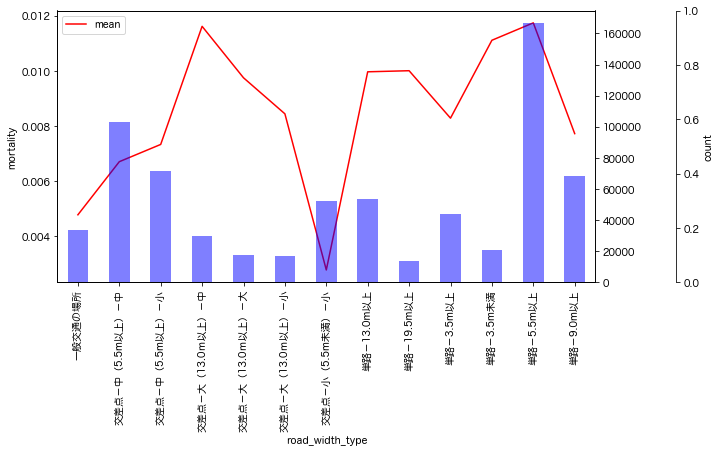

In [79]:
target_string = 'road_width_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

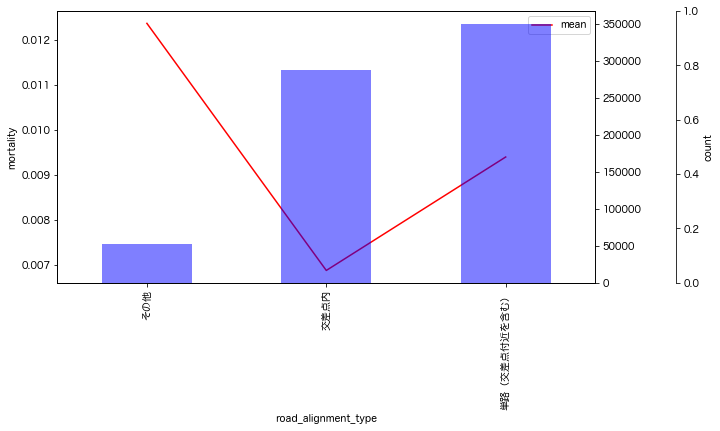

In [80]:
target_string = 'road_alignment_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

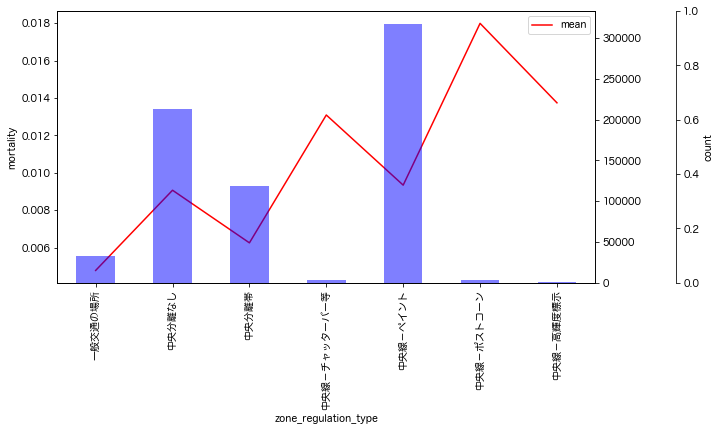

In [81]:
target_string = 'zone_regulation_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

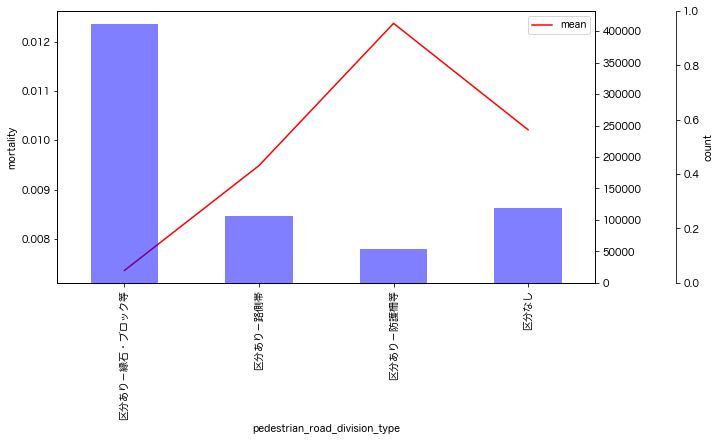

In [82]:
target_string = 'pedestrian_road_division_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

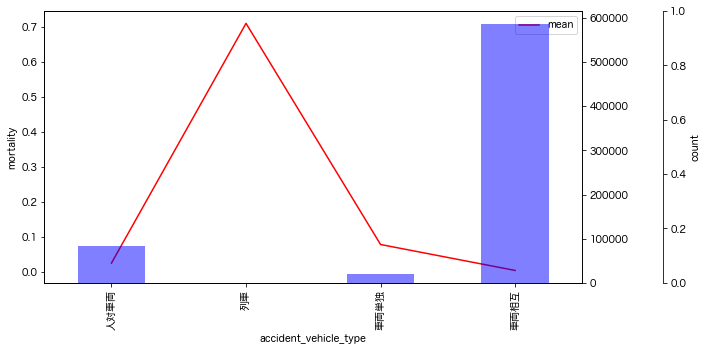

In [83]:
target_string = 'accident_vehicle_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)


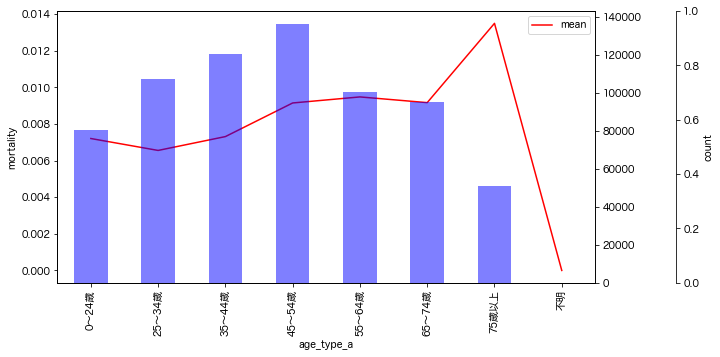

In [84]:
target_string = 'age_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

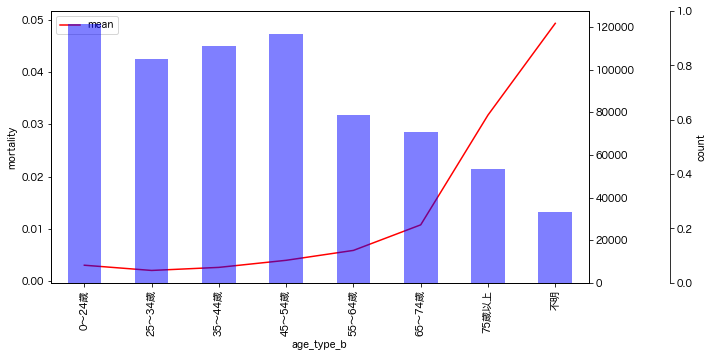

In [85]:
target_string = 'age_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

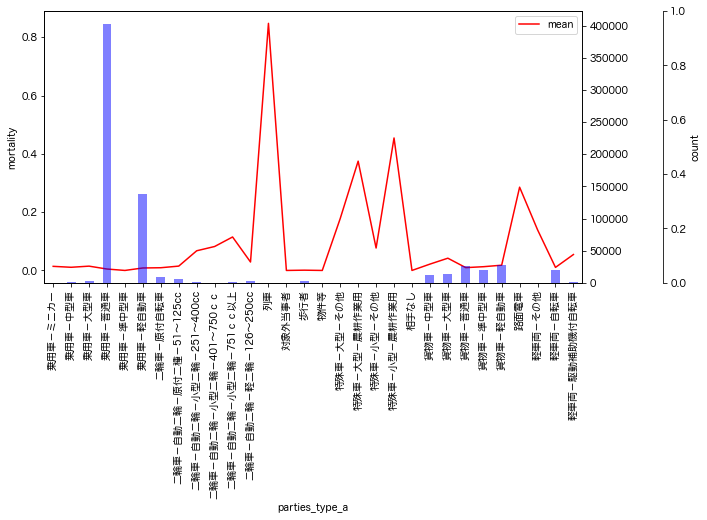

In [86]:
target_string = 'parties_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

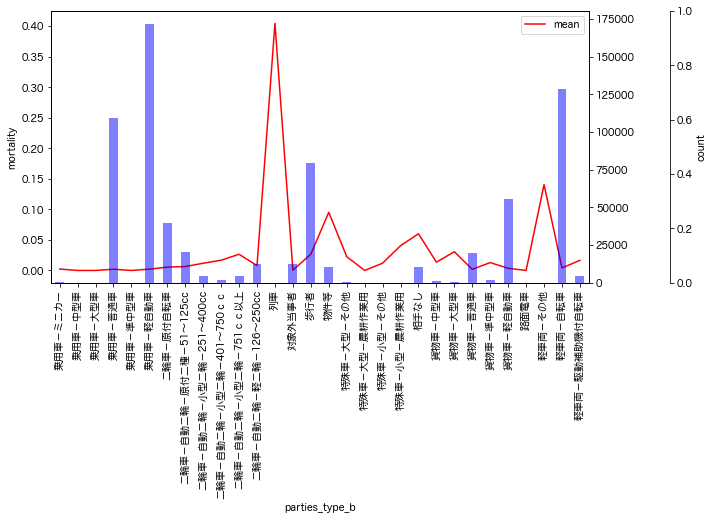

In [87]:
target_string = 'parties_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

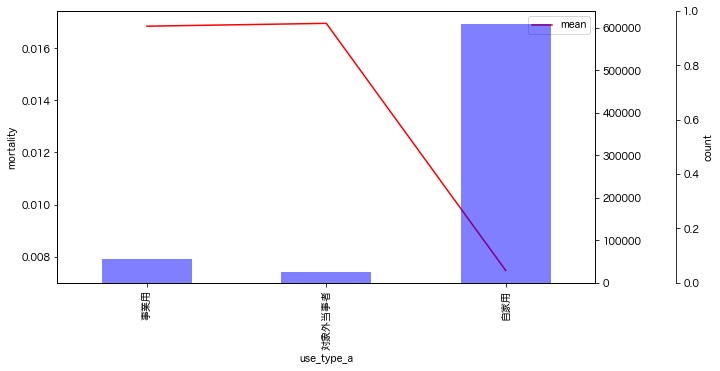

In [88]:
target_string = 'use_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

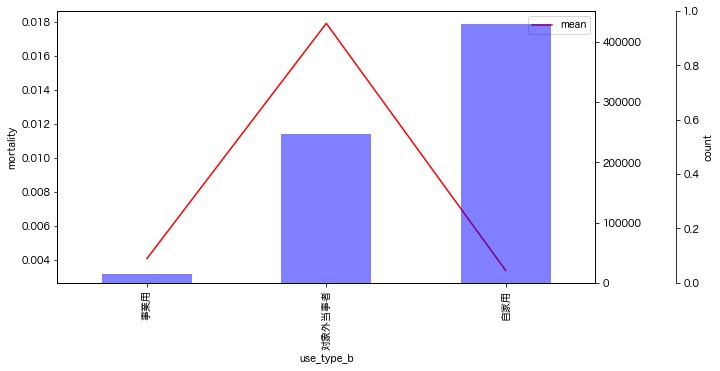

In [89]:
target_string = 'use_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

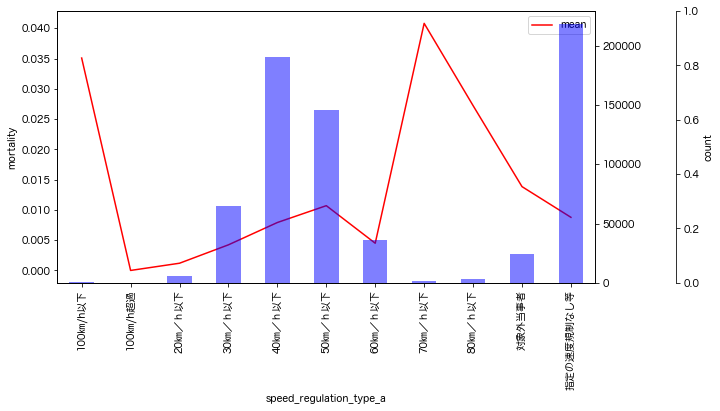

In [90]:
target_string = 'speed_regulation_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)


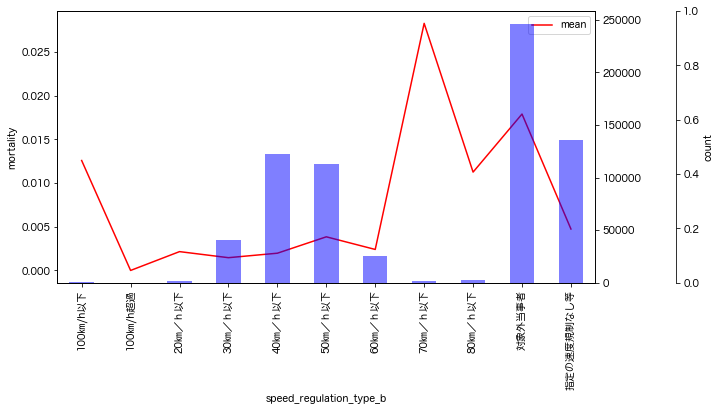

In [91]:
target_string = 'speed_regulation_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

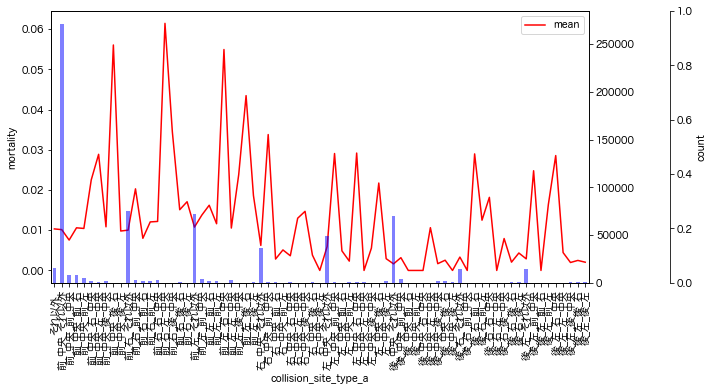

In [92]:
target_string = 'collision_site_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

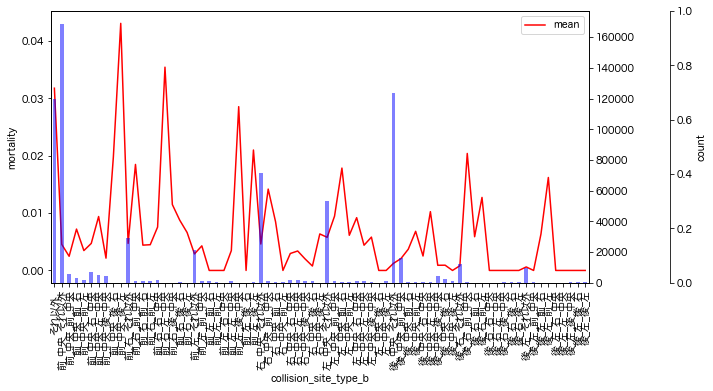

In [93]:
target_string = 'collision_site_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

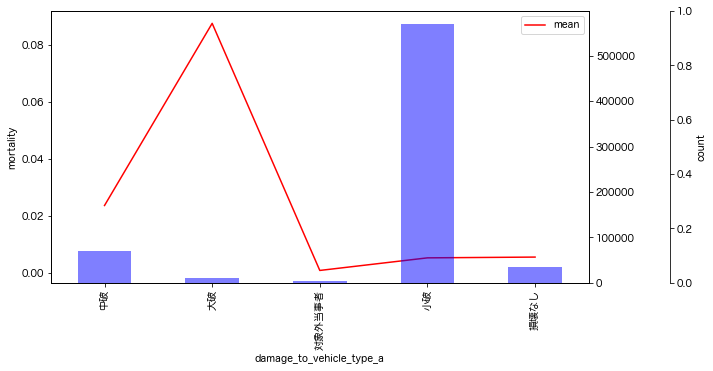

In [94]:
target_string = 'damage_to_vehicle_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

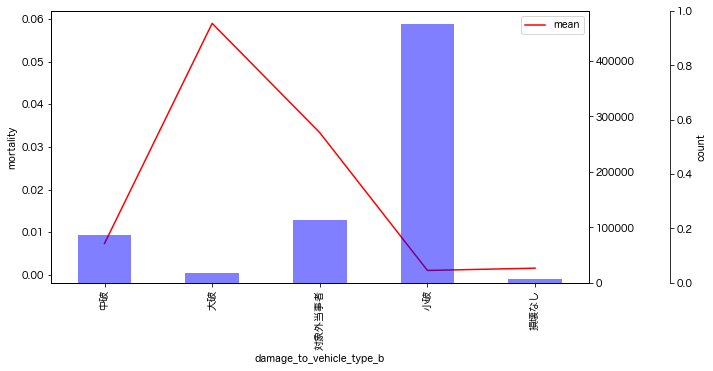

In [95]:
target_string = 'damage_to_vehicle_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

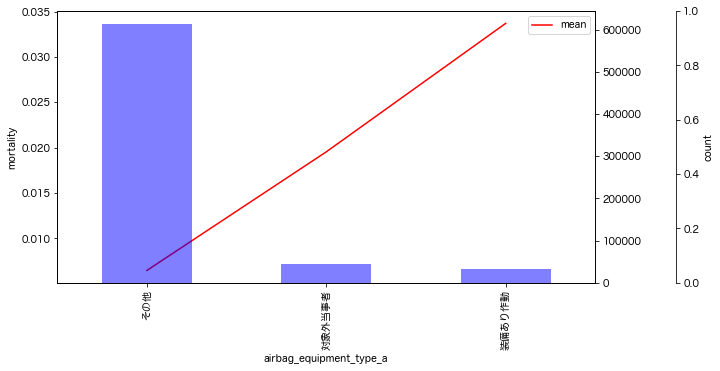

In [96]:
target_string = 'airbag_equipment_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

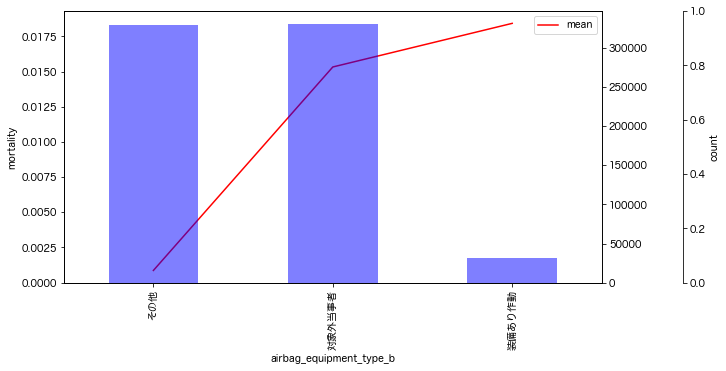

In [97]:
target_string = 'airbag_equipment_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

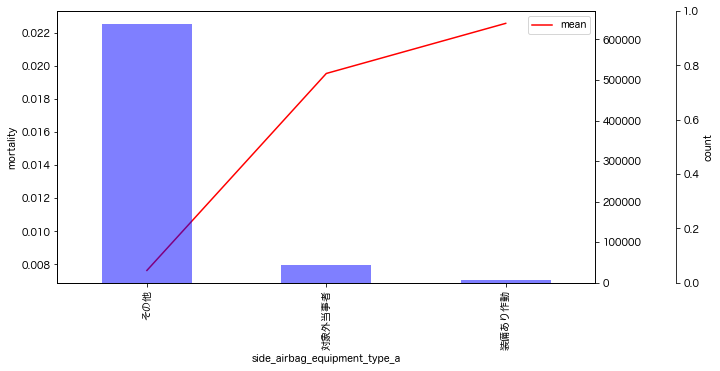

In [98]:
target_string = 'side_airbag_equipment_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

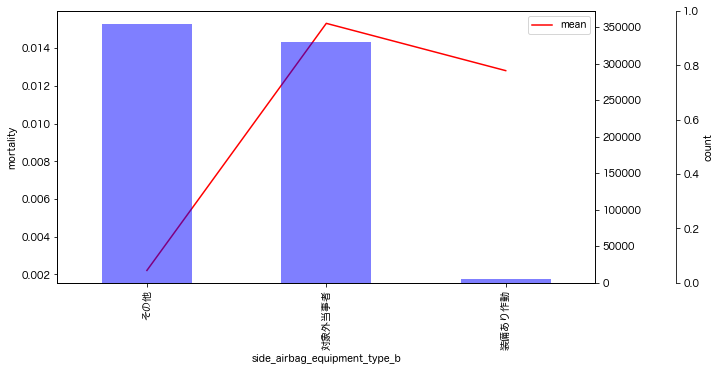

In [99]:
target_string = 'side_airbag_equipment_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

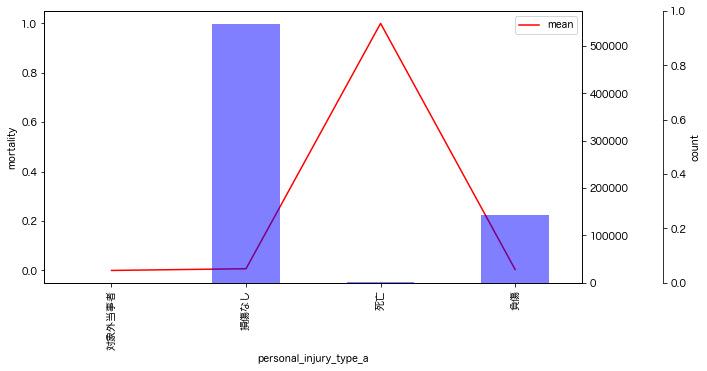

In [100]:
target_string = 'personal_injury_type_a'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

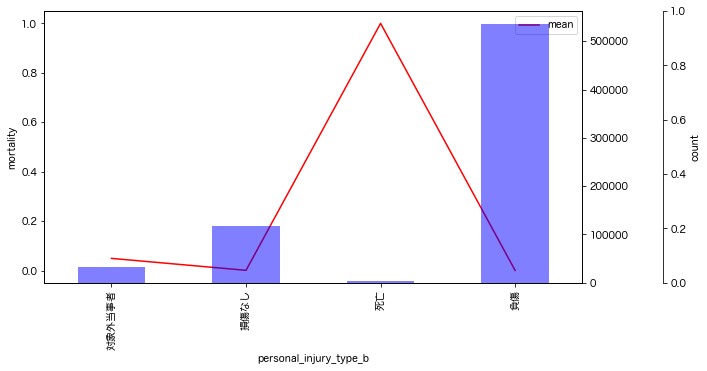

In [101]:
target_string = 'personal_injury_type_b'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

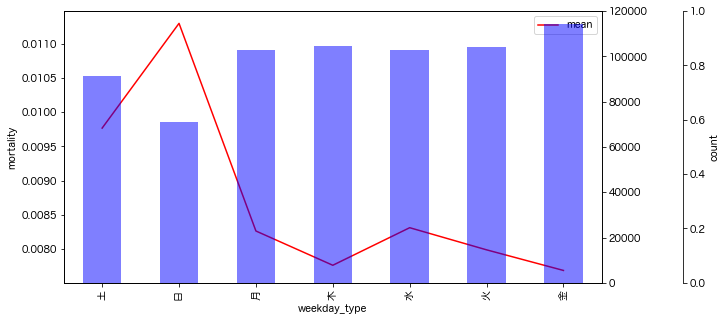

In [102]:
target_string = 'weekday_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

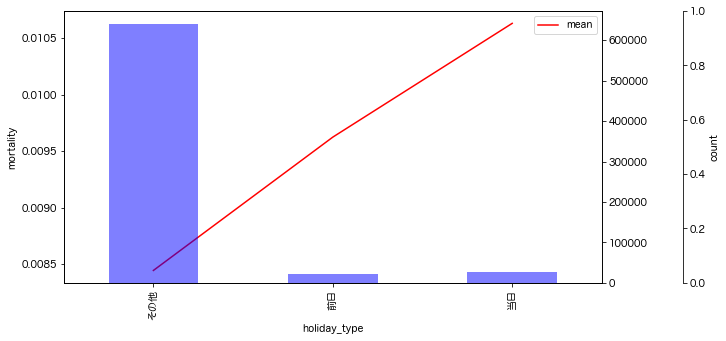

In [103]:
target_string = 'holiday_type'
df_summary = GroupbyPlot(df=traffic_accident_data, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

# メッシュ

メッシュについて<br>
http://www.nilim.go.jp/lab/bcg/siryou/tnn/tnn0574pdf/ks057408.pdf <br>

メッシュ計算用のコード<br>
https://www.gis-py.com/entry/py-latlon2mesh

In [104]:
from decimal import Decimal, ROUND_HALF_UP

In [105]:
def dms2deg(dms):    
    # 度分秒から度への変換
    if len(str(dms)) == 10:        
        h = int(str(dms)[0:3])
        m = int(str(dms)[3:5])
        s = int(str(dms)[5:7])
    elif len(str(dms)) == 9:
        h = int(str(dms)[0:2])
        m = int(str(dms)[2:4])
        s = int(str(dms)[4:6])
    deg = Decimal(str(h + (m / 60) + (s / 3600))).quantize(Decimal('0.0001'), rounding=ROUND_HALF_UP)
    return str(deg)

In [107]:
traffic_accident_data = traffic_accident_data[traffic_accident_data["地点\u3000緯度（北緯）"] > 100000]
traffic_accident_data = traffic_accident_data[traffic_accident_data["地点\u3000経度（東経）"] > 100000].reset_index(drop=True)

In [109]:
traffic_accident_data["latitude"] = list(map(lambda id:dms2deg(traffic_accident_data["地点\u3000緯度（北緯）"][id]),
                                                                                     range(traffic_accident_data.index.size)))
traffic_accident_data["longitude"] = list(map(lambda id:dms2deg(traffic_accident_data["地点\u3000経度（東経）"][id]),
                                                                                     range(traffic_accident_data.index.size)))

traffic_accident_data["latitude"] = traffic_accident_data["latitude"].astype(float)
traffic_accident_data["longitude"] = traffic_accident_data["longitude"].astype(float)

In [110]:
def latlon2mesh(lat, lon):
    #1次メッシュ上2けた
    quotient_lat, remainder_lat = divmod(lat * 60, 40)
    first2digits = str(quotient_lat)[0:2]

    #1次メッシュ下2けた
    last2digits = str(lon - 100)[0:2]
    remainder_lon = lon - int(last2digits) - 100

    #1次メッシュ
    first_mesh = first2digits + last2digits

    #2次メッシュ上1けた
    first1digits, remainder_lat = divmod(remainder_lat, 5)

    #2次メッシュ下1けた
    last1digits, remainder_lon = divmod(remainder_lon * 60, 7.5)

    #2次メッシュ
    second_mesh = first_mesh + str(first1digits)[0:1] + str(last1digits)[0:1]

    #3次メッシュ上1けた
    first1digits, remainder_lat = divmod(remainder_lat * 60, 30)

    #3次メッシュ下1けた
    last1digits, remainder_lon = divmod(remainder_lon * 60, 45)

    #3次メッシュ
    third_mesh = second_mesh + str(first1digits)[0:1] + str(last1digits)[0:1]
    
    return third_mesh

In [111]:
%%time
traffic_accident_data["third_mesh"] = list(map(lambda id:latlon2mesh(traffic_accident_data.latitude[id],
                                                                traffic_accident_data.longitude[id]), range(traffic_accident_data.index.size)))


CPU times: user 6.61 s, sys: 28.6 ms, total: 6.64 s
Wall time: 6.65 s


In [112]:
traffic_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690300 entries, 0 to 690299
Columns: 115 entries, 資料区分 to third_mesh
dtypes: datetime64[ns](1), float64(3), int64(62), object(49)
memory usage: 605.7+ MB
